In [4]:
#Data Cleaning and Pre processing by retrieving from GitHub repository 

import pandas as pd

#Loading the raw data set from GitHub: Klebsiella pneumoniae resistance to Meropenem antibiotics 

url = "https://raw.githubusercontent.com/san-mhe/amr-meropenem-resistance-prediction/master/data/klebsiella_meropenem_raw.csv"
df = pd.read_csv(url)

#Inspecting the data structure 

df.shape, df.head()

print(df.columns.tolist())







['Genome ID', 'AAC(3)-IId', 'AAC(3)-IIe', 'AAC(3)-IV', 'AAC(3)-Ia', "AAC(6')-29a", "AAC(6')-33", "AAC(6')-IIa", "AAC(6')-IIc", "AAC(6')-Ib-cr", "AAC(6')-Ib10", "AAC(6')-Ib7", "AAC(6')-Ib9", "AAC(6')-Il", "AAC(6')-Im", "ANT(2'')-Ia", "ANT(3'')-IIa", "APH(2'')-IIa", "APH(3'')-Ib", "APH(3')-Ia", "APH(3')-VI", "APH(3')-VIa", 'APH(4)-Ia', 'APH(6)-Id', 'BKC-1', 'CARB-3', 'CMY-59', 'CTX-M-1', 'CTX-M-101', 'CTX-M-14', 'CTX-M-15', 'CTX-M-2', 'CTX-M-27', 'CTX-M-3', 'CTX-M-65', 'CTX-M-9', 'CTX-M-98', 'DHA-1', 'DHA-6', 'EreA2', 'ErmB', 'FOX-5', 'FosA3', 'FosA5', 'FosA6', 'FosA7', 'IMP-14', 'KPC-1', 'KPC-3', 'KPC-8', 'Klebsiella_pneumoniae_KpnE', 'Klebsiella_pneumoniae_KpnF', 'Klebsiella_pneumoniae_KpnG', 'Klebsiella_pneumoniae_OmpK37', 'Klebsiella_pneumoniae_acrA', 'LAP-2', 'LEN-10', 'LEN-16', 'LEN-17', 'LEN-18', 'LEN-2', 'LEN-26', 'LEN-30', 'LEN-55', 'LEN-9', 'MCR-9', 'NDM-1', 'NDM-5', 'OKP-A-3', 'OKP-A-5', 'OKP-A-7', 'OKP-B-19', 'OKP-B-3', 'OKP-B-5', 'OKP-B-6', 'OKP-B-8', 'OXA-1', 'OXA-10', 'OXA

In [6]:
#Restructure the data to eliminate unnecessary columns not studied in this project 

#Step 1: Gene columns
gene_cols = df.columns[1:df.columns.get_loc("Genome Name_x")]

#Step 2: Define the label column
label_col = "Resistant Phenotype"

#Step 3: Subset and rename
df_clean = df[['Genome ID'] + list(gene_cols) + [label_col]].copy()
df_clean.rename(columns={label_col: 'Resistance'}, inplace=True)

#Step 4: Map label to binary
df_clean['Resistance'] = df_clean['Resistance'].map({'Resistant': 1, 'Susceptible': 0})

#Step 5: Quick check
print(df_clean.shape)
df_clean['Resistance'].value_counts()




(1580, 197)


Resistance
0    1054
1     526
Name: count, dtype: int64

In [7]:
#Training begins from here

#Library import

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

#Train-Test Split 

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

#Define X and y Data

X = df_clean.drop(columns=['Genome ID', 'Resistance'])
y = df_clean['Resistance']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)






Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.91      0.92       211
           1       0.82      0.90      0.86       105

    accuracy                           0.90       316
   macro avg       0.89      0.90      0.89       316
weighted avg       0.91      0.90      0.90       316



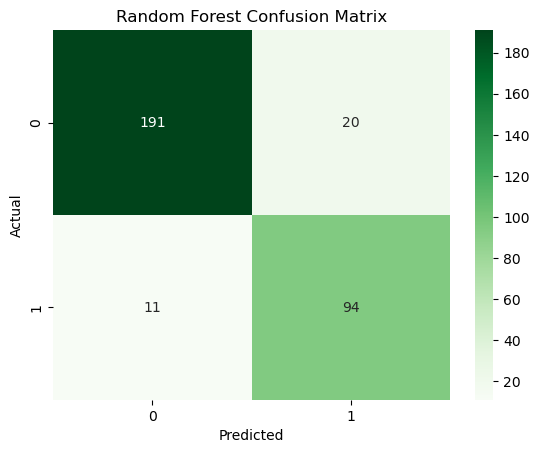

In [8]:
#Train Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

# Evaluation
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       211
           1       0.86      0.92      0.89       105

    accuracy                           0.92       316
   macro avg       0.91      0.92      0.92       316
weighted avg       0.93      0.92      0.92       316



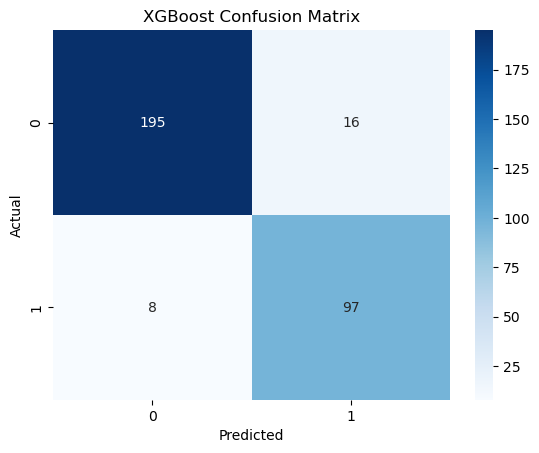

In [11]:
#Train XG Boost Classifier 

import xgboost as xgb

xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42
)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)


#Evaluation

print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

#Confusion Matrix

sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

 98%|===================| 620/632 [00:30<00:00]        

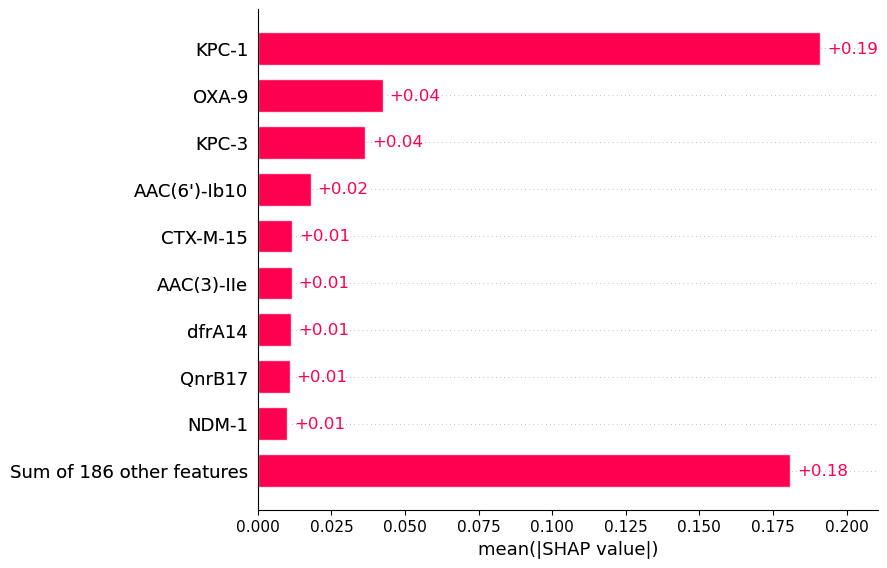

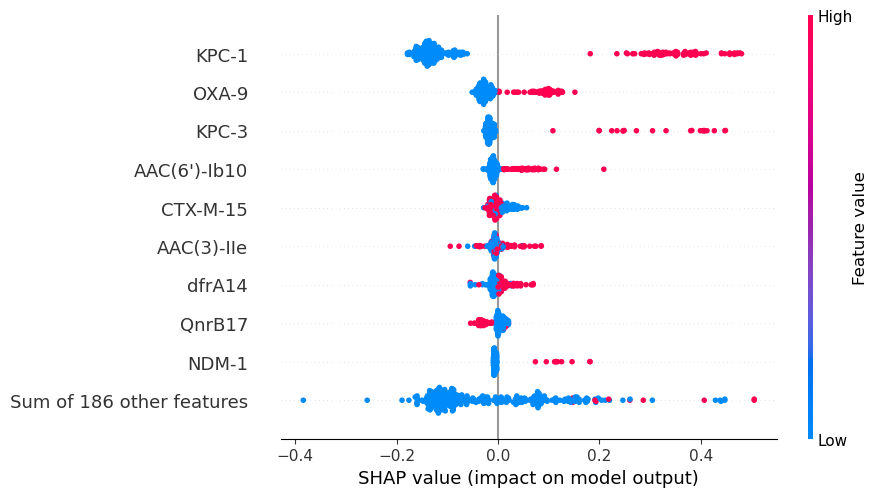

Top 10 SHAP Genes for Class 1 (Resistant):
                                 Feature  Mean_SHAP_Value
46                                 KPC-1         0.191038
81                                 OXA-9         0.042378
47                                 KPC-3         0.036479
9                           AAC(6')-Ib10         0.018061
29                              CTX-M-15         0.011702
1                             AAC(3)-IIe         0.011580
161                               dfrA14         0.011319
84                                QnrB17         0.010796
65                                 NDM-1         0.010016
158  determinant_of_bleomycin_resistance         0.009778


In [22]:
#Running SHAP Explainability 
#SHAP for Random Forest Model

import shap
import pandas as pd

#Restore proper feature names
feature_names = X.columns.tolist()
X_test = pd.DataFrame(X_test, columns=feature_names)

#Create SHAP explainer
explainer_rf = shap.Explainer(rf_model, X_test)
shap_values_rf = explainer_rf(X_test)

#Extract class 1 (Resistant)
shap_class1 = shap_values_rf.values[:, :, 1]

#SHAP plots
shap.plots.bar(shap_values_rf[:, :, 1])       #Bar chart for class 1
shap.plots.beeswarm(shap_values_rf[:, :, 1])  #Beeswarm for class 1


#Top Features Table

import numpy as np
import pandas as pd

#Get mean absolute SHAP values per feature for class 1 (Resistant)
mean_shap_class1 = np.abs(shap_values_rf.values[:, :, 1]).mean(axis=0)

#Create DataFrame with feature names and mean SHAP values
top_features_df = pd.DataFrame({
    'Feature': feature_names,
    'Mean_SHAP_Value': mean_shap_class1
}).sort_values(by='Mean_SHAP_Value', ascending=False)

#Display the top 10 genes
print("Top 10 SHAP Genes for Class 1 (Resistant):")
print(top_features_df.head(10))





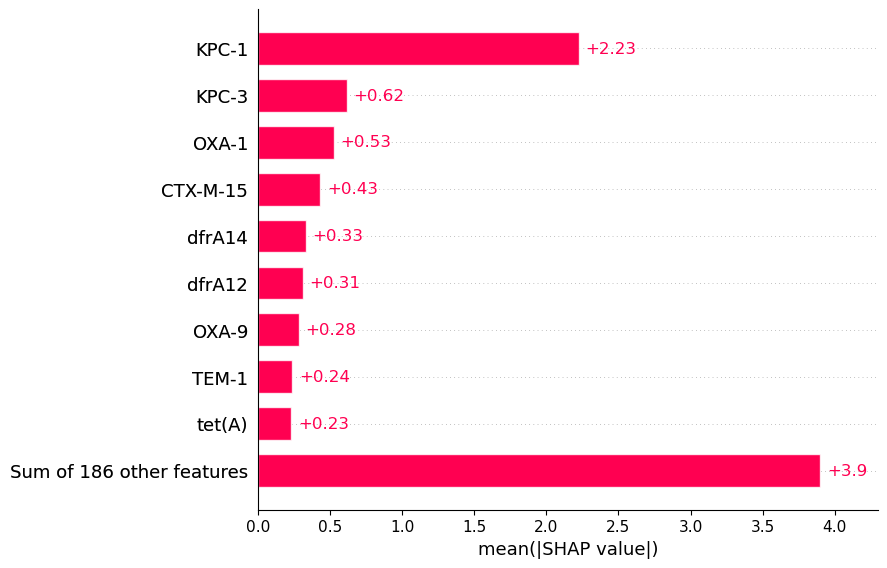

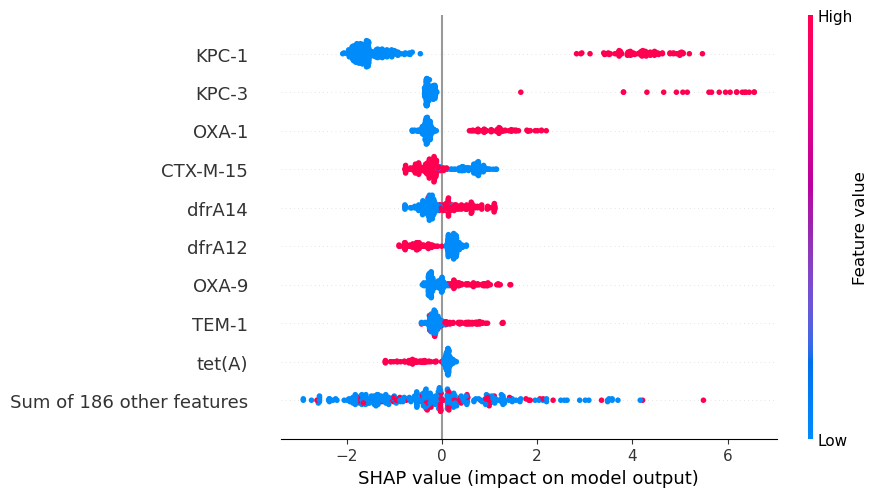

Top 10 SHAP Genes for XGBoost Model (Resistant Class):
          Feature  Mean_SHAP_Value
46          KPC-1         2.226191
47          KPC-3         0.615192
75          OXA-1         0.526808
29       CTX-M-15         0.433423
161        dfrA14         0.333633
160        dfrA12         0.311231
81          OXA-9         0.282500
130         TEM-1         0.238302
187        tet(A)         0.232827
9    AAC(6')-Ib10         0.214778


In [25]:
#SHAP for XGBoost Classifier 

import shap
import pandas as pd
import numpy as np

#Restore feature names
feature_names = X.columns.tolist()
X_test = pd.DataFrame(X_test, columns=feature_names)

#Create SHAP explainer for XGBoost
explainer_xgb = shap.Explainer(xgb_model, X_test)

#Get SHAP values (shape: [n_samples, n_features])
shap_values_xgb = explainer_xgb(X_test)

# Visualize SHAP (bar + beeswarm)
shap.plots.bar(shap_values_xgb)       
shap.plots.beeswarm(shap_values_xgb)

#Mean absolute SHAP value per feature
mean_shap_values = np.abs(shap_values_xgb.values).mean(axis=0)

#Create DataFrame
top_features_df_xgb = pd.DataFrame({
    'Feature': feature_names,
    'Mean_SHAP_Value': mean_shap_values
}).sort_values(by='Mean_SHAP_Value', ascending=False)

#Display top 10 genes
print("Top 10 SHAP Genes for XGBoost Model (Resistant Class):")
print(top_features_df_xgb.head(10))



